# Exercise 6

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

Fun with Numpy Slicing and Broadcast assignment.

1) Creating an array

In [15]:
a = np.array([[1.,2.],[3.,4.],[5.,6.]])
print(a)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]


2)Getting Array shape

In [16]:
print(a.shape)
print(a.shape[0])
print(a.shape[1])

(3, 2)
3
2


3) Creating array of zeros

In [17]:
b = np.zeros((10,5))
print(b)
print(b.shape)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(10, 5)


4) Using for loop to write an array

In [18]:
c = np.zeros((10,5)) #Note the parenthesis. The argument is a tuple.
nrow, ncol = c.shape
for irow in range(nrow):
    for icol in range(ncol):
        c[irow,icol] = 20*irow + icol
        #you can do either c[irow][icol] or c[irow, icol]
print(c)

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.   42.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [ 140.  141.  142.  143.  144.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


5) Access array.

In [19]:
#row 2
print (c[2])
#row 2 column 3
print (c[2][3])
print (c[2,3]) #either way

[ 40.  41.  42.  43.  44.]
43.0
43.0


6) Array Slicing

In [ ]:
print(c[1:4,2]) #first index can be from [2,4) = 2,3 (not including the end)
         #second index has to be 2

In [ ]:
print(c[1, 1:5]) #first index 1, second index from [1,5) = 1,2,3,4

In [ ]:
print(c[1:3,2:5]) #you can slice a rectangle from it too

In [ ]:
print(c[1:,2]) #row 1 and on, column 2

In [ ]:
print(c[:3,2]) #row 0,1,2 and column 2

In [ ]:
print(c[:3,:]) #row 0,1,2 and every column

7) The one we normally use

In [20]:
print(c[:,1]) #First index everything (:), Second index must be 1
             #this means getting column 1

[   1.   21.   41.   61.   81.  101.  121.  141.  161.  181.]


In [ ]:
print(c[2,:]) #First index is 2, Second index can be anything
             #This means row number 2.

8) Reference or copy? It's reference.

In [ ]:
d = c[2,:]
print(d)
d[2] = 0
print(d)
print(c)

9) What if you want a copy?

In [ ]:
c3 = c.copy()

In [ ]:
c3[1,1] = 999
print(c3)
print(c)

10) Refrence is actually the right choice of implementation. It allows you to do this broadcast assignment.

In [21]:
c[7,:] = 1 #all row 7 or c becomes 1
print(c)

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.   42.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [   1.    1.    1.    1.    1.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


In [22]:
#you can do this too
c[2,:] = c[3,:] + c[5,:]
print(c)

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [ 160.  162.  164.  166.  168.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [   1.    1.    1.    1.    1.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


In [23]:
c[:,1] = c[:,1]*2 #column 1 all multiply by 2
print(c)

[[   0.    2.    2.    3.    4.]
 [  20.   42.   22.   23.   24.]
 [ 160.  324.  164.  166.  168.]
 [  60.  122.   62.   63.   64.]
 [  80.  162.   82.   83.   84.]
 [ 100.  202.  102.  103.  104.]
 [ 120.  242.  122.  123.  124.]
 [   1.    2.    1.    1.    1.]
 [ 160.  322.  162.  163.  164.]
 [ 180.  362.  182.  183.  184.]]


###Gaussian Elimination.

See the notes. That's your homework.

###System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [11]:
def u(x,y):
    return x**2+x*y-10
    #return something

def v(x,y):
    return y+3*x*y**2-57
    #return something

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

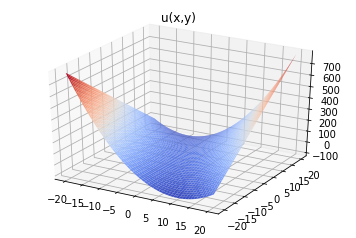

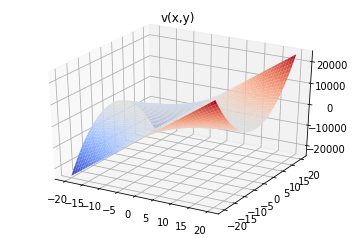

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
# print (ygrid)
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

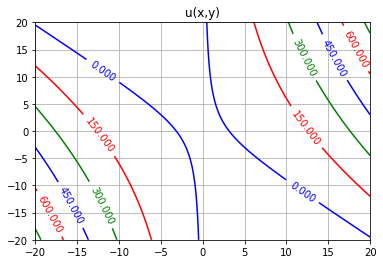

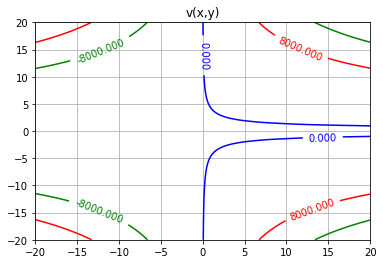

In [6]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

In [ ]:
intersection between line 0.0 of u and v 

4)Let's overlay them on top of each other.

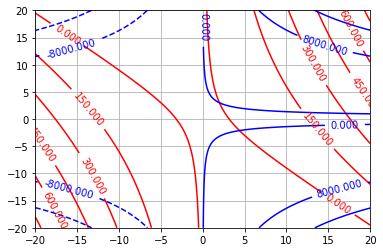

In [7]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

around 2 and 4 

###Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

In [18]:
def u(x,y):
    return x**2+x*y-10

def v(x,y):
    return y+3*x*y**2-57

def udx(x,y):
    return 2*x+y 

def udy(x,y):
    return x 

def vdx(x,y):
    return 3*y**2

def vdy(x,y):
    return 6*x*y+1 

def newton2D(x,y):
    A = np.array([
        [udx(x,y), udy(x,y)],
        [vdx(x,y), vdy(x,y)]
        ])
    
    C = np.array(
    [-u(x,y)+udx(x,y)*x+udy(x,y)*y,
    -v(x,y)+vdx(x,y)*x+vdy(x,y)*y])
    return np.linalg.solve(A,C)   

2)Where should you start your guess ($x_0, y_0$)?

In [21]:
print(newton2D(3,4))

[ 2.09556314  3.34812287]


3) Find ($x_1, y_1$)

In [22]:
print(newton2D(2.09556314,3.34812287))

[ 1.99568902  3.03574293]


4)Find ($x_2, y_2$)

In [23]:
print(newton2D(1.99568902, 3.03574293))

[ 1.99992881  3.00018278]


5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just at plt.plot([x],[y])). You may use np.linalg.solve.

In [24]:
#update rule >> more accurate 
def solveNewton2d(x,y):
    for i in range(5):
        x,y = newton2D(x,y)     
    return x,y

print(solveNewton2d(3,4))   

(2.0, 3.0)


6) Find the other solution.

In [25]:
print(solveNewton2d(4,-2))

(4.3937441932885992, -2.1177810147141836)


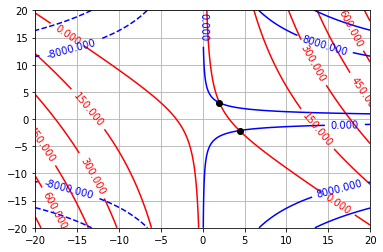

In [28]:
ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

plt.plot(2,3,'o',color='k')
plt.plot(4.3937441932885992, -2.1177810147141836,'o',color='k')

7) Does it guarantee to converge to the right answer?

 yes, it converge really fast 
 but it's not guarantee convergence, if you pick too far point >> plot to see first   

8) Implement np.linalg.solve using gaussian elimination.